<a href="https://colab.research.google.com/github/Sayan567/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Raw_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>


In [12]:
#import all necessary function 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
##Importing Data
data = pd.read_csv('Hotel Bookings.csv')

## Show the first 5 rows of Data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:
# Copy the dataset

df = data.copy()

1. Dealing with Missing Values
Check if our data contains any missing values


In [15]:
# Find the missing value, show the total null values for each column and sort it in descending order

df.isnull().sum().sort_values(ascending=False)[:10]

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64

We have 4 features with missing values.
In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

In [16]:
## If no id of agent or company isnull, just replace it with 0
df[['agent','company']] = df[['agent','company']].fillna(0.0)

Children column contains the count of children, so we will replace all the missing values with the rounded mean value.

And our country column contains country codes representing different countries. It is a categorical feature so I will also replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often.

In [17]:
## For the missing values in the country column, replace it with mode (value that appears most often)

df['country'].fillna(df.country.mode().to_string(), inplace=True)

## for missing children value, replace it with rounded mean value
df['children'].fillna(round(df.children.mean()), inplace=True)

There are many rows that have zero guests including adults, children and babies. 

In [18]:
df[(df.adults+df.babies+df.children)==0].shape

(180, 32)

We have 180 such rows. we will just remove these rows.


In [19]:
## Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

2. Converting Datatype

---


Let’s check the datatype of each column in our dataset.


In [20]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

1. We can see different data types for different columns.
2. There are some columns like children, company, and agent, that are float type but their values are only in integers.
So we will convert them to the integer type.

In [21]:
## convert datatype of these columns from float to integer

df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [22]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

([<matplotlib.patches.Wedge at 0x7f2c4b5f74d0>,
 [Text(-0.9570941673166501, -0.5421906997435941, 'City Hotel'),
  Text(1.0223506420402169, 0.579158151734012, 'Resort Hotel')],
 [Text(-0.5220513639909, -0.29574038167832406, '66.4%'),
  Text(0.5873078156401245, 0.33270787440038974, '33.6%')])

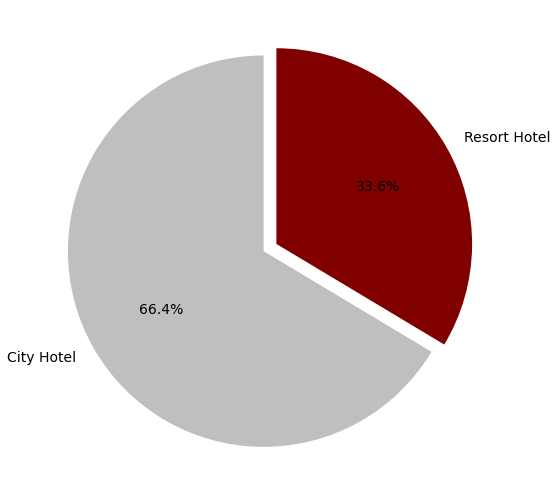

In [24]:
#Overview of type of hotel

#Enlarging pie chart
plt.rcParams['figure.figsize'] = 9,9

#Indexing labels
labels = df['hotel'].value_counts().index.tolist()

#Convert value counts to list
sizes = df['hotel'].value_counts().tolist()

#Explode to determine how much each section is separated from each other
explode = (0,0.075)

#Coloring pie chart
colors = ['0.75', 'maroon']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})

**From the pie chart above we can see that two thirds of bookers chose the city hotel option.**

In [25]:
#Grouping by adults to get summary statistics on hotel type

df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79163.0,1.854882,0.502676,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40047.0,1.867755,0.696587,1.0,2.0,2.0,2.0,55.0


In [26]:
#Grouping by children to get summary statistics on hotel type

df['children'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79163.0,0.091558,0.372537,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40047.0,0.128724,0.445261,0.0,0.0,0.0,0.0,10.0


# Exploratory Data Analysis

1. How Many Booking Were Cancelled?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


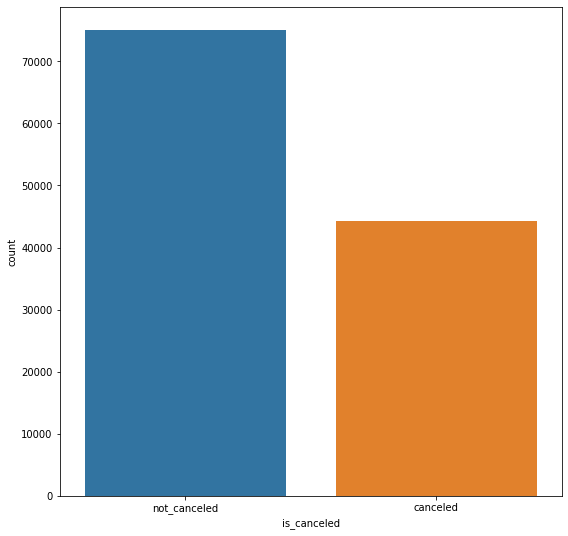

In [27]:
#analyzing canceled bookings data

df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = df['is_canceled']
sns.countplot(canceled_data)

`Using a countplot, we were able to graph the total amout of canceled vs non-canceled data. It appears the majority of bookings were not_canceled.`

Text(0.5, 1.0, 'Graph depicting cancellation rates in city and resort hotel')

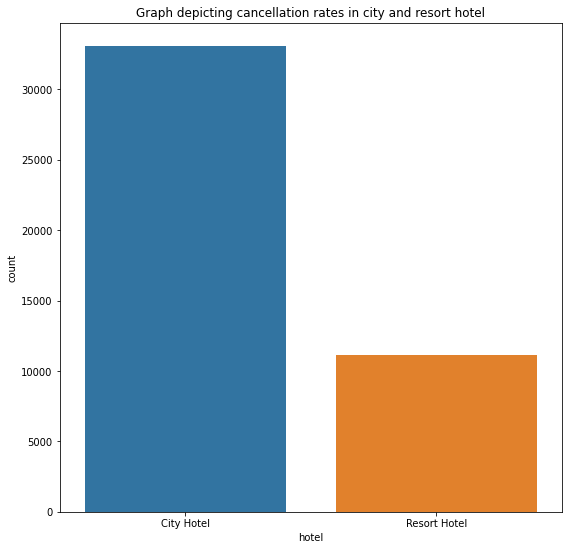

In [28]:
#Analyzing cancellation rate amongst hotel types

lst1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = df[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name='count')
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title('Graph depicting cancellation rates in city and resort hotel')

`We see a large number of cancelations from city hotels. Keep in mind most bookings were at city hotels.`

Text(0.5, 1.0, 'Graph showing number of arrivals per year')

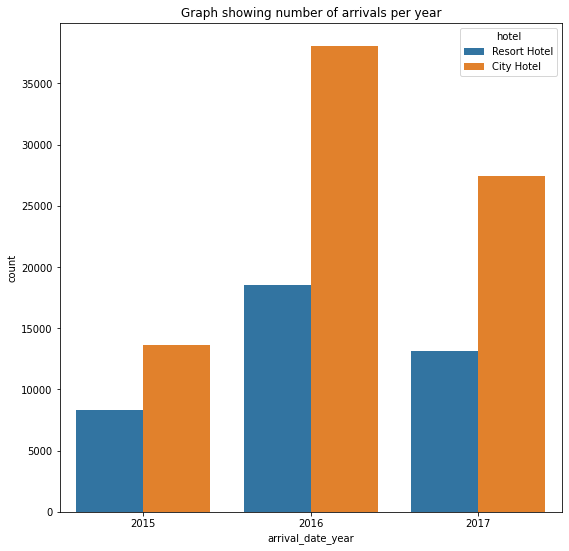

In [29]:
#Graph arrival year

lst3 = ['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
period_arrival = df[lst3]
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel').set_title('Graph showing number of arrivals per year')

`In the plot above we se that city hotels had the most bookings consistently each year with the largest amount of bookings in 2016.`

Text(0, 0.5, 'Count')

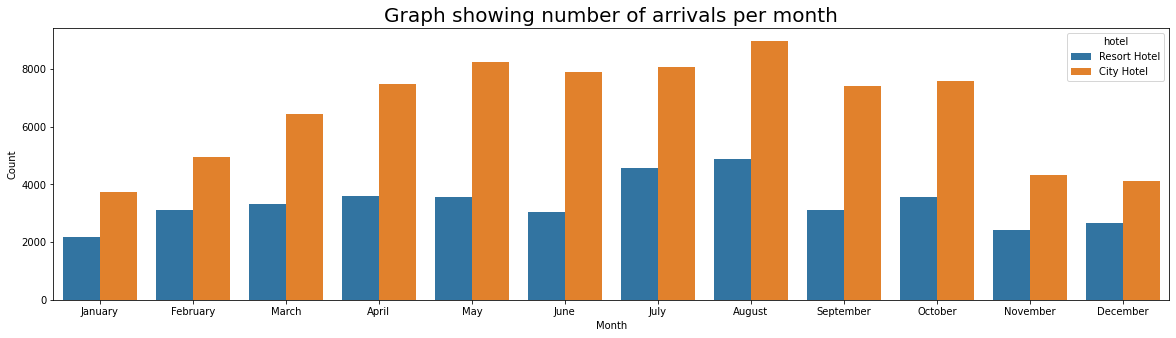

In [30]:
#Graph arrival month

plt.figure(figsize=(20,5)) # adjust the size of the plot

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrivals per month',fontsize=20)
plt.xlabel('Month') # Creating label for xaxis
plt.ylabel('Count') # Creating label for yaxis

Text(0.5, 1.0, 'Graph showing number of arrivals per day')

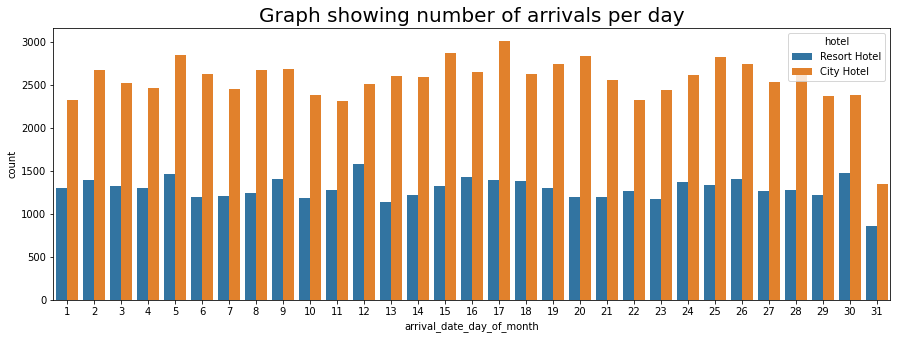

In [31]:
#Graph arrival dates
plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Graph showing number of arrivals per day', fontsize = 20)

1. Booking rates were highest during the year of 2016. 

2. Additionally, the trend shows that bookings occurs at the highest rate around the middle of year, with August being the highest. 

3. Data shows that summer is a peak season for hotel booking. 

4. There is a wave like structure to arrivals by day. My speculation is that these peaks depict hotel bookings on the weekends at a higher rate.

Text(0.5, 1.0, 'Number of stays on weekend nights')

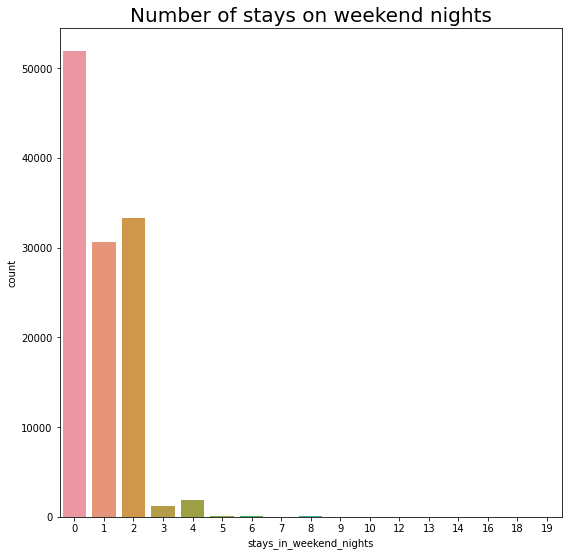

In [32]:
#Graphing weekend vs. weekday data

sns.countplot(data = df, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 20)

Text(0.5, 1.0, 'Number of stays on weekday night')

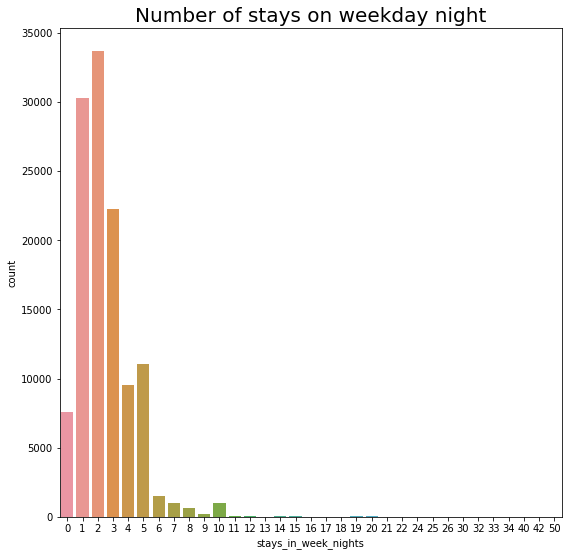

In [33]:
sns.countplot(data = df, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize = 20)

Our hypothesis was proven false as the majority of stays were on weekday nights.

Text(0.5, 1.0, 'Number of adults')

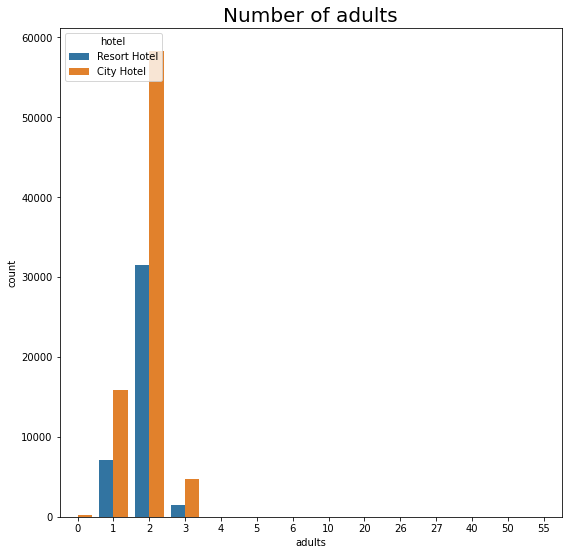

In [35]:
#Graphing data by types of visitors

sns.countplot(data = df, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)

Text(0.5, 1.0, 'Number of children')

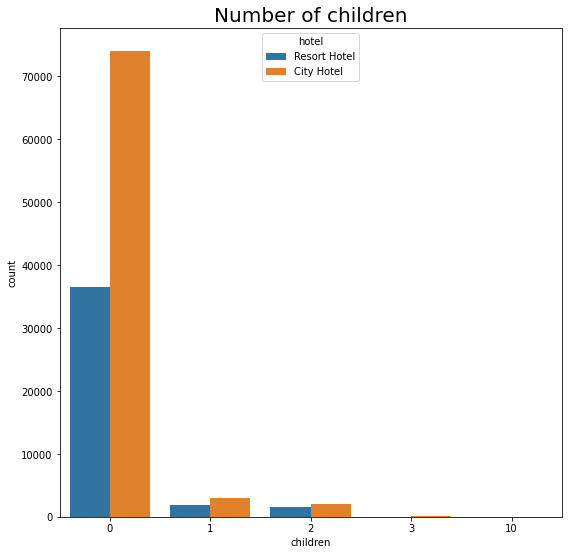

In [36]:
sns.countplot(data = df, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)

Text(0.5, 1.0, 'Number of babies')

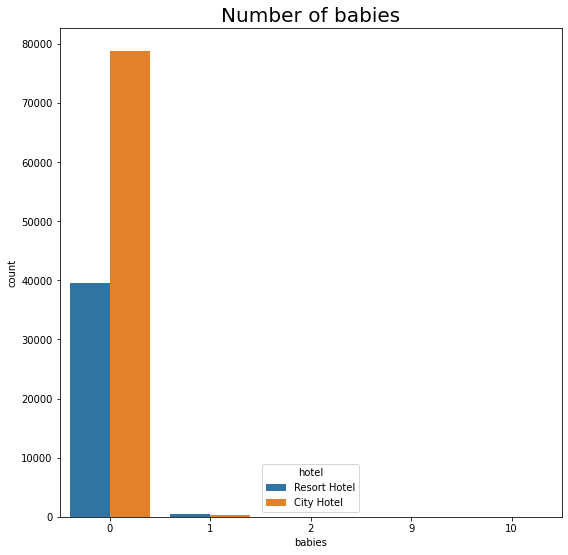

In [37]:
sns.countplot(data = df, x = 'babies', hue = 'hotel').set_title("Number of babies", fontsize = 20)

The data shows us that travelers tend to book hotels in pairs and that those traveling with a baby prefer to book a resort hotel.

In [38]:
#Graphing booking data by country of origin
country_visitors = df[df['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')

# We will be using Plotly.express to plot a choropleth map. Big fan of Plotly here!
import plotly.express as px

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Home country of visitors")


`From the plot we can see a large number of hotel bookers are from the UK, with the highest numbers of bookings originating from France and Portugal.`

Text(0.5, 1.0, 'Graph showing types of deposits')

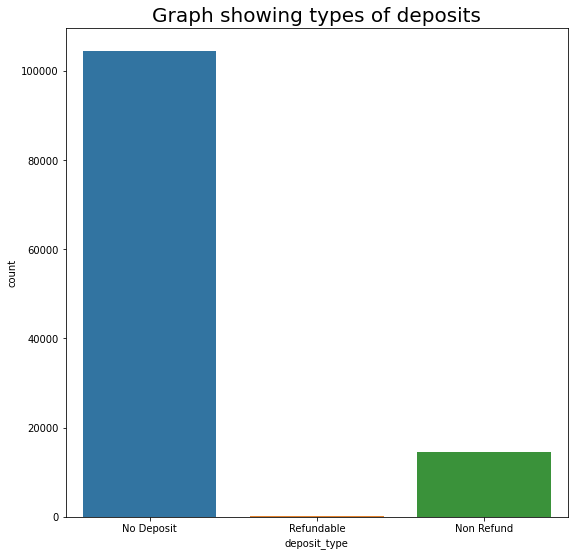

In [39]:
#graphing deposit types
sns.countplot(data = df, x = 'deposit_type').set_title('Graph showing types of deposits', fontsize = 20)

`Majority of bookings did not require a deposit, this could explain the high cancelation rate.`

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

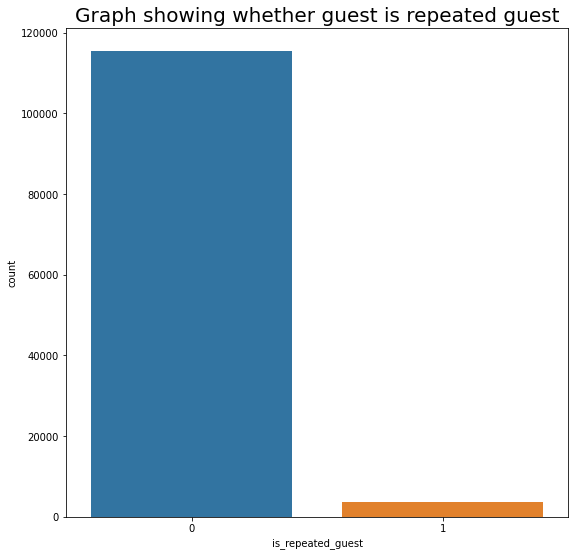

In [40]:
#graph repeated guests
sns.countplot(data = df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)

Data shows a low number of repeated guests. In business, it is far more expensive to gain a new customer than to retain an exisiting one. 

Further business or marketing efforts could be drafted to improve rate of return.

Text(0.5, 1.0, 'Graph showing type of guest')

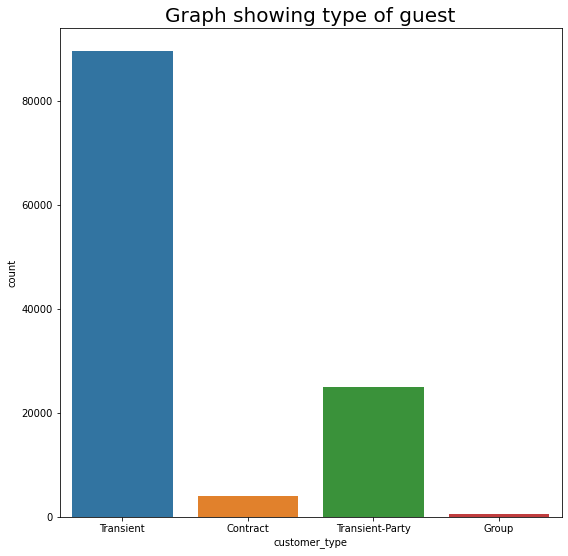

In [41]:
#graph types of guests
sns.countplot(data = df, x = 'customer_type').set_title('Graph showing type of guest', fontsize = 20)

The majority of bookings are transient. 

This is defined as a booking that is not a part of a group or contract. 

Booking online independtly is becoming increasingly consumer friendly which could explain this data.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



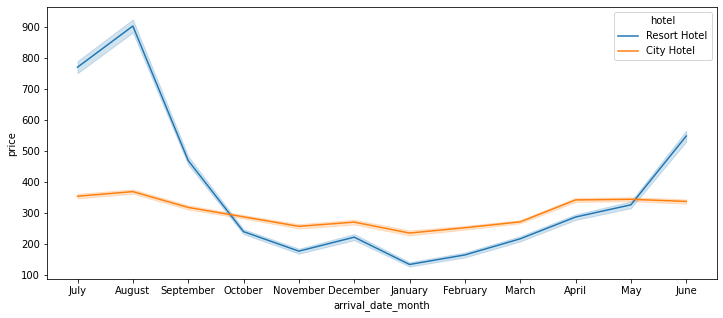

In [44]:
#graphing prices per month per hotel
#average daily rate = (sumOfAllLodgingTransaction/TotalNumberOfStayingNight)
#average daily rate per person = (ADR/Adults+Children)

# Resizing plot 
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
actual_guests = df.loc[df["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')

Prices of the resort hotel are typically higher than the city hotel, with highest rates during busy months of travel in the summer, ie. August, June, and July.

**Summary:**

---



1.  City hotels account for 2/3s of all bookings, Resort hotels account for 1/3.
2.  About 50% of all bookings are cancelled.
3.  2016 showed the highest rate of hotel bookings. (data from 2015-2017)
4.  Highest daily rates occurred in the summer (June, July, August)
5.  More bookings occured on weekdays vs weekends.
6.  Bookers with children or babies booked at resorts at a higher rate.
7.  UK, France, and Portugal booked the most hotel stays worldwide.
8.  Majority of hotel bookings did not require a deposit.
9.  Most bookings came from independent, transient customers.
10. 90% of bookings were not return guests.

